# Coursera Capstone Project
This notebook will be used for the purpose of completing the "IBM Data Science Professional Certificate" Capstone Project

The objective of the project will be to confirm whether driving conditions can indicate the severity of an incident.

### Table of Contents

* [Week 1 - Introduction/Business Problem](#introduction)
* [Week 1 - Data Collection](#collection)
* [Week 2 - Data Preparation and Cleaning](#preparation)
* [Week 2 - Data Analysis Exploration](#exploration)
* [Week 2 - Machine Learning and Model Selection](#machine)
* [Week 2 - Decision Tree Model Evaluation](#evaluation)

### Week 1 - Introduction/Business Problem  <a name="introduction"></a>

Automobile incidents can have a varying severity. Depending on the severity, the outcome can a small or large impact on other people. 
A lower severity may have a smaller impact on emergency resources and traffic patterns. While a large severity would require a greater response and drastically impact traffic patterns. 
Being able to know the difference would provide a better way to respond to an incident, decrease the severity of on an incident, or, better yet, being able to prevent an incident. 
The data collected from previous accidents can be utilized to better improve awareness and predictability of future accidents. The data can be manipulated and used to train models to better inform drivers and key decision makers (e.g. Emergency dispatchers) in response to traffic incidents.

### Week 1 - Data Collection <a name="collection"></a>

The data that will be used for this example Capstone project will be the [example data](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv "Traffic Data") provided by Coursera. With the dataset, there is provided information on the Metadata that can be found on the following [link](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf "Metadata"). Upon review of the Metadata, it can be seen that there are several usable features from the dataset. Furthermore, there are also several attributes that are administrative codes and references that will need to be removed.

Examples of useful attributes:

1. ROADCOND: The condition of the road during the collision
1. LIGHTCOND: The light conditions during the collision. 
1. WEATHER: A description of the weather conditions during the time of the collision. 
  
Examples of not usable attributes:

1. SDOT_COLDESC: A description of the collision corresponding to the collision code.
1. SEVERITYDESC: A detailed description of the severity of the collision 
1. REPORTNO: Report number of incident

#### Capturing Data

First, the data will need to be downloaded and exatracted into a dataframe to be more easily viewed. From the above example data link, the existing format is in an ".csv" format and will be more easily manipulated into a Pandas dataframe. To do this, a few key libraries will need to be imported.

In [78]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [79]:
import folium
print('Folium installed and imported!')

Folium installed and imported!


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters
print('Hello Capstone Project')

Hello Capstone Project


In [81]:
# Download the shared data and create pandas dataframe
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv('Data-Collisions.csv')
df.head()

--2020-11-02 23:38:05--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  42.2MB/s   in 1.7s   

2020-11-02 23:38:07 (42.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Comparing the Metadata to the initial view

Now that the data is in a easy to use format, a few of the characteristics can be explored to have a better understanding of how the data will need to be prepared and cleaned.

In [82]:
df.shape

(194673, 38)

In [83]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### Week 2 - Data Preparation and Cleaning <a name="preparation"></a>

Before diving too deep into the data, an initial bit of information should be gathered from the dataframe.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Firstly, the datafram contains 194673 rows and 38 columns. The columns consists of a lot of interger data and categorical data in the form of strings (objects). Lastly, there are a few columns that contain some or a significant amount of Null values. Null values or categories, will be a good place to start with cleaning the data.

In [85]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

There are columns such as 'PEDROWNOTGRNT' and 'EXCEPTRSNDESC' that contain mostly null values. These attributes will not be very helpful without information and therefore can be dropped to make the dataframe easier to manage. Secondly, many of the columns aren't attributes and are references to ID values, which are not usuable for prediction nor machine learning. For example, 'INCKEY' is just a column that will be droppped to save memory and make processing the data easier.

In [86]:
dft = df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY','REPORTNO','STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
                   'EXCEPTRSNDESC','SEVERITYCODE.1', 'SEVERITYDESC', 'INCDATE', 'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
                   'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1)
dft.head(10)

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,10,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,11,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,32,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,23,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,10,N
5,1,-122.387598,47.690575,Intersection,Angles,2,0,0,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,NaN,N,Clear,Dry,Daylight,NaN,10,N
6,1,-122.338485,47.618534,Intersection,Angles,2,0,0,2,12/9/2008,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,10,N
7,2,-122.320780,47.614076,Intersection,Cycles,3,0,1,1,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,NaN,N,Clear,Dry,Daylight,NaN,5,N
8,1,-122.335930,47.611904,Block,Parked Car,2,0,0,2,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,NaN,0,Clear,Dry,Daylight,NaN,32,N
9,2,-122.384700,47.528475,Intersection,Angles,2,0,0,2,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,NaN,0,Clear,Dry,Daylight,NaN,10,N


#### Data Cleaning

Now that we have a more manageable size dataframe, the remaining columns need to be checked for null values and dealt with.

In [87]:
dft.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
ADDRTYPE            1926
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
ST_COLCODE            18
HITPARKEDCAR           0
dtype: int64

Need to remove the null values from several columns. After those have been removed, need to convert UNDERINFL, INATTENTIONIND, and SPEEDING to binary values. 

For INATTENTIONIND and SPEEDING, unless it's explicitly a yes, 0 will be assigned to mean it was a 'No' or no data.

In [88]:
dftwo = dft.dropna(subset=['X','Y','ADDRTYPE','COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE'])

dftwo.loc[:,'UNDERINFL'].replace(['Y','N'],['1','0'], inplace=True)
dftwo['UNDERINFL'] = dftwo.loc[:,'UNDERINFL'].astype(str).astype(int)

dftwo = dftwo.fillna(value={'INATTENTIONIND':0})
dftwo.loc[:,'INATTENTIONIND'].replace(['Y'],[1], inplace=True)

dftwo = dftwo.fillna(value={'SPEEDING':0})
dftwo.loc[:,'SPEEDING'].replace(['Y'],[1], inplace=True)

dftwo['INCDTTM'] = pd.to_datetime(dftwo.INCDTTM)
dftwo['TIME'] = pd.DatetimeIndex(dftwo['INCDTTM']).time

dftwo.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(180067, 21)

There was not an excessive amount of data removed and there is still a significant amount of data remaining to analyze.

In [89]:
dftwo.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,HITPARKEDCAR,TIME
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,2013-03-27 14:54:00,...,11,0,0,Overcast,Wet,Daylight,0,10,N,14:54:00
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,2006-12-20 18:55:00,...,16,0,0,Raining,Wet,Dark - Street Lights On,0,11,N,18:55:00
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,2004-11-18 10:20:00,...,14,0,0,Overcast,Dry,Daylight,0,32,N,10:20:00
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,2013-03-29 09:26:00,...,11,0,0,Clear,Dry,Daylight,0,23,N,09:26:00
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,2004-01-28 08:04:00,...,11,0,0,Raining,Wet,Daylight,0,10,N,08:04:00


At this point, it is noticed that the columns WEATHER, ROADCOND, and LIGHTCOND have some values marked as "Unknown" that were missed by the dropna. So we will need to take care of those.

In [90]:
dftwo[['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE']] = dftwo[['WEATHER', 'ROADCOND','LIGHTCOND','JUNCTIONTYPE']].astype(str).replace({'Unknown':np.NaN})
dftwo = dftwo.dropna(subset=['WEATHER', 'ROADCOND', 'LIGHTCOND','JUNCTIONTYPE'])
dftwo.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,HITPARKEDCAR,TIME
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,2013-03-27 14:54:00,...,11,0,0,Overcast,Wet,Daylight,0,10,N,14:54:00
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,2006-12-20 18:55:00,...,16,0,0,Raining,Wet,Dark - Street Lights On,0,11,N,18:55:00
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,2004-11-18 10:20:00,...,14,0,0,Overcast,Dry,Daylight,0,32,N,10:20:00
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,2013-03-29 09:26:00,...,11,0,0,Clear,Dry,Daylight,0,23,N,09:26:00
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,2004-01-28 08:04:00,...,11,0,0,Raining,Wet,Daylight,0,10,N,08:04:00


### Week 2 - Data Analysis Exploration <a name="exploration"></a>

#### Date and Time Factor of incidents

Traffic is busier and more congested during some parts of the day compared to others. Furthermore, some months of the year have more treacherous driving conditions. The hypothesis is that time can be a possible factor to help aid in determining when accidents and different severities occur.

First, the 'INCDTTM' dattime data will need to broken down into interger based data to easier to plot.

In [91]:
import datetime
from datetime import date
from datetime import datetime

In [92]:
df_tt = dftwo[['SEVERITYCODE', 'TIME']]

df_tt['YEAR'] = pd.to_datetime(dftwo['INCDTTM']).dt.year
df_tt['HOUR'] =  pd.to_datetime(dftwo['INCDTTM']).dt.hour
df_tt['WEEKDAY'] =  pd.to_datetime(dftwo['INCDTTM']).dt.weekday
df_tt['MONTH'] =  pd.to_datetime(dftwo['INCDTTM']).dt.month
df_tt.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,SEVERITYCODE,TIME,YEAR,HOUR,WEEKDAY,MONTH
0,2,14:54:00,2013,14,2,3
1,1,18:55:00,2006,18,2,12
2,1,10:20:00,2004,10,3,11
3,1,09:26:00,2013,9,4,3
4,2,08:04:00,2004,8,2,1


In [93]:
df_ttw_temp = df_tt.groupby(['SEVERITYCODE','WEEKDAY']).size().unstack()
df_ttw = df_ttw_temp.transpose()

df_tth_temp0 = df_tt
df_tth_temp0[['TIME']] = df_tth_temp0[['TIME']].astype(str).replace({'00:00:00':np.NaN})
df_tth_temp0 = df_tth_temp0.dropna(subset=['TIME'])
df_tth_temp1 = df_tth_temp0.groupby(['SEVERITYCODE','HOUR']).size().unstack()
df_tth = df_tth_temp1.transpose()

df_tty_temp = df_tt.groupby(['SEVERITYCODE', 'YEAR']).size().unstack()
df_tty = df_tty_temp.transpose()

df_ttm_temp = df_tt.groupby(['SEVERITYCODE', 'MONTH']).size().unstack()
df_ttm = df_ttm_temp.transpose()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


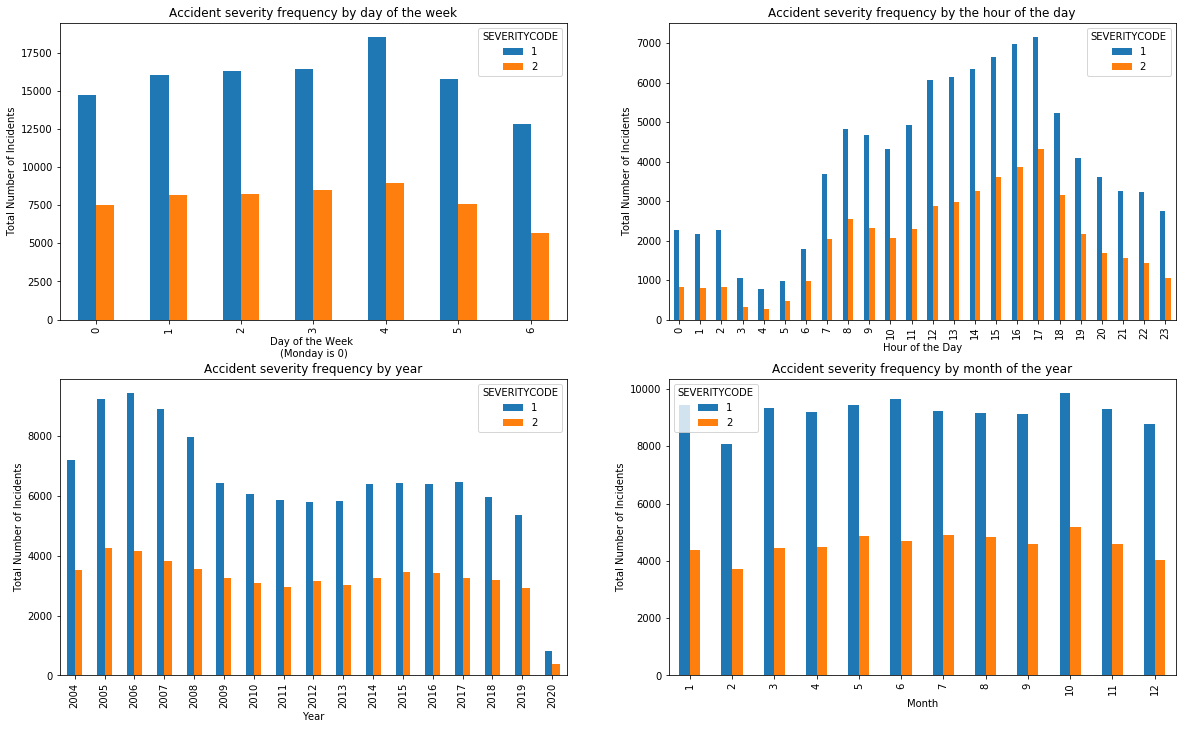

In [94]:
fig = plt.figure()

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

df_ttw.plot(kind='bar', figsize=(20,12), ax=ax0)
ax0.set_title('Accident severity frequency by day of the week')
ax0.set_xlabel('Day of the Week \n(Monday is 0)')
ax0.set_ylabel('Total Number of Incidents')

df_tth.plot(kind='bar', figsize=(20,12), ax=ax1)
ax1.set_title('Accident severity frequency by the hour of the day')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Total Number of Incidents')

df_tty.plot(kind='bar', figsize=(20,12), ax=ax2)
ax2.set_title('Accident severity frequency by year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Number of Incidents')

df_ttm.plot(kind='bar', figsize=(20,12), ax=ax3)
ax3.set_title('Accident severity frequency by month of the year')
ax3.set_xlabel('Month')
ax3.set_ylabel('Total Number of Incidents')

plt.show()

A few observations can be made from the above data. It appears that incident rates total are higher on Fridays. Saturdays show that there is as lower amount of severity code 2 incidents to code 1. Finally, Sunday shows an overall incident total lower on Sundays.

The time of day also plays a big factor on when indicents are expected to occur. The hours of 3 through 6 am tend to have the lower amount of incidents and steadily increase afterwards. The trend in incident rates starts declining from 6 pm, which makes sense since this is after the normal business hours and when people have returned home.

The bottom two charts do not provide very good data for modelling. While there are trends in the traffic accidents by years, this will not be useful for predicting current year nor future year data. Using the yearly data could overfit the data to the training data and make it less useful.  Lastly, the monthly data, while statistically significant, does not show a significant trend in line with seasonal expectations (eg winter driving being worse). However, this is possible limited by the location and will be explored in the data later.

In [95]:
dftwo['YEAR'] = dftwo['INCDTTM'].dt.year
dftwo['HOUR'] = dftwo['INCDTTM'].dt.hour
dftwo['WEEKDAY'] = dftwo['INCDTTM'].dt.weekday
dftwo['MONTH'] = dftwo['INCDTTM'].dt.month

dftwo[['TIME']] = dftwo[['TIME']].astype(str).replace({'00:00:00':np.NaN})
dftwo = dftwo.dropna(subset=['TIME'])

dftwo.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,HITPARKEDCAR,TIME,YEAR,HOUR,WEEKDAY,MONTH
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,2013-03-27 14:54:00,...,Wet,Daylight,0,10,N,14:54:00,2013,14,2,3
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,2006-12-20 18:55:00,...,Wet,Dark - Street Lights On,0,11,N,18:55:00,2006,18,2,12
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,2004-11-18 10:20:00,...,Dry,Daylight,0,32,N,10:20:00,2004,10,3,11
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,2013-03-29 09:26:00,...,Dry,Daylight,0,23,N,09:26:00,2013,9,4,3
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,2004-01-28 08:04:00,...,Wet,Daylight,0,10,N,08:04:00,2004,8,2,1


In [96]:
dftwo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143014 entries, 0 to 194672
Data columns (total 25 columns):
SEVERITYCODE      143014 non-null int64
X                 143014 non-null float64
Y                 143014 non-null float64
ADDRTYPE          143014 non-null object
COLLISIONTYPE     143014 non-null object
PERSONCOUNT       143014 non-null int64
PEDCOUNT          143014 non-null int64
PEDCYLCOUNT       143014 non-null int64
VEHCOUNT          143014 non-null int64
INCDTTM           143014 non-null datetime64[ns]
JUNCTIONTYPE      143014 non-null object
SDOT_COLCODE      143014 non-null int64
INATTENTIONIND    143014 non-null int64
UNDERINFL         143014 non-null int64
WEATHER           143014 non-null object
ROADCOND          143014 non-null object
LIGHTCOND         143014 non-null object
SPEEDING          143014 non-null int64
ST_COLCODE        143014 non-null object
HITPARKEDCAR      143014 non-null object
TIME              143014 non-null object
YEAR              143014 no

#### Driving/Road Conditions

Let's check out and see the number of Occurences and Severity for Weather

In [97]:
dfw_temp = pd.get_dummies(dftwo[['WEATHER']],prefix='',prefix_sep='')
dfw_conc = pd.concat([dftwo[['SEVERITYCODE']], dfw_temp], axis=1)
dfw = dfw_conc.groupby('SEVERITYCODE', as_index=True).sum()
dfw

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
SEVERITYCODE,,,,,,,,,,
1,25.0,61171.0,322.0,131.0,15202.0,2.0,17817.0,16.0,65.0,555.0
2,13.0,30681.0,165.0,58.0,7309.0,3.0,9311.0,7.0,23.0,138.0


In [98]:
dfw.loc[1]/(dfw.loc[1]+dfw.loc[2])

Blowing Sand/Dirt           0.657895
Clear                       0.665974
Fog/Smog/Smoke              0.661191
Other                       0.693122
Overcast                    0.675314
Partly Cloudy               0.400000
Raining                     0.656775
Severe Crosswind            0.695652
Sleet/Hail/Freezing Rain    0.738636
Snowing                     0.800866
dtype: float64

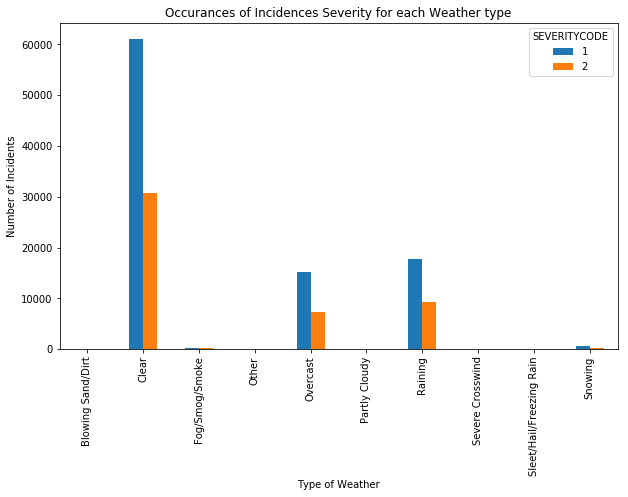

In [99]:
dfw_t = dfw.transpose()
dfw_t.plot(kind='bar', figsize=(10,6))
plt.title('Occurances of Incidences Severity for each Weather type')
plt.ylabel('Number of Incidents')
plt.xlabel('Type of Weather')
plt.show()

Let's Check out and see the number of Occurences and Severity for Road Conditions

In [100]:
dfr_temp = pd.get_dummies(dftwo[['ROADCOND']],prefix='',prefix_sep='')
dfr_conc = pd.concat([dftwo[['SEVERITYCODE']], dfr_temp], axis=1)
dfr = dfr_conc.groupby('SEVERITYCODE', as_index=True).sum()
dfr

,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
SEVERITYCODE,,,,,,,,
1,68294.0,726.0,22.0,52.0,29.0,578.0,52.0,25553.0
2,34138.0,225.0,15.0,34.0,16.0,135.0,23.0,13122.0


In [101]:
dfr.loc[1]/(dfr.loc[1]+dfr.loc[2])

Dry               0.666725
Ice               0.763407
Oil               0.594595
Other             0.604651
Sand/Mud/Dirt     0.644444
Snow/Slush        0.810659
Standing Water    0.693333
Wet               0.660711
dtype: float64

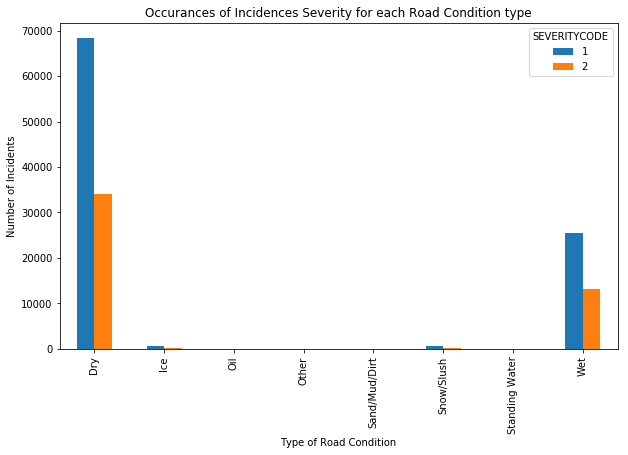

In [102]:
dfr_t = dfr.transpose()
dfr_t.plot(kind='bar', figsize=(10,6))
plt.title('Occurances of Incidences Severity for each Road Condition type')
plt.ylabel('Number of Incidents')
plt.xlabel('Type of Road Condition')
plt.show()

Let's Check out and see the number of Occurences and Severity for Light Conditions

In [103]:
dfl_temp = pd.get_dummies(dftwo[['LIGHTCOND']],prefix='',prefix_sep='')
dfl_conc = pd.concat([dftwo[['SEVERITYCODE']], dfl_temp], axis=1)
dfl = dfl_conc.groupby('SEVERITYCODE', as_index=True).sum()
dfl

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
SEVERITYCODE,,,,,,,,
1,881.0,634.0,26970.0,4.0,1295.0,62367.0,3058.0,97.0
2,269.0,269.0,12184.0,4.0,701.0,32652.0,1597.0,32.0


In [104]:
dfl.loc[1]/(dfl.loc[1]+dfl.loc[2])

Dark - No Street Lights     0.766087
Dark - Street Lights Off    0.702104
Dark - Street Lights On     0.688819
Dark - Unknown Lighting     0.500000
Dawn                        0.648798
Daylight                    0.656363
Dusk                        0.656928
Other                       0.751938
dtype: float64

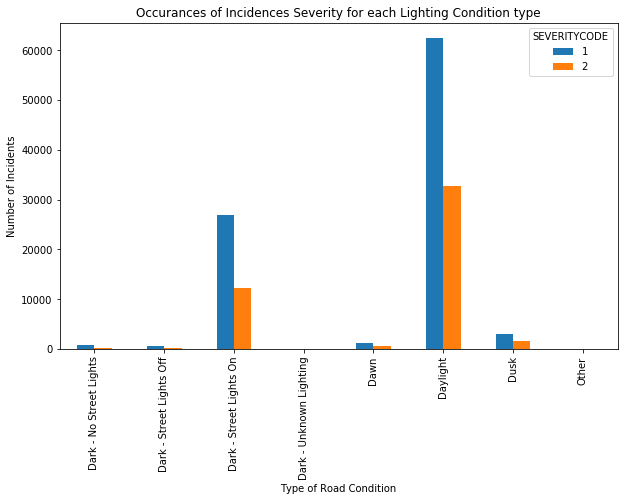

In [105]:
dfl_t = dfl.transpose()
dfl_t.plot(kind='bar', figsize=(10,6))
plt.title('Occurances of Incidences Severity for each Lighting Condition type')
plt.ylabel('Number of Incidents')
plt.xlabel('Type of Road Condition')
plt.show()

#### Mapping Incidents by SEVERITYCODE

It can help to visualize where accidents occur and what severity code is related. One easy way to do this is by utilizing the folium package that was imported. The dataset is quite large and would take a lot of processing power and could clutter the visualization. As a result, only a small portion of the data will be used.

In [106]:
#Use only a 3000 rows to test display
limit = 3000
df_incidents = dftwo.iloc[0:limit,:]
df_incidents.shape

(3000, 25)

In [107]:
df_incidents['SEVERITYCODE'] = df_incidents['SEVERITYCODE'].astype(str)
df_incidents_sev1 = df_incidents.loc[lambda df_incidents: df_incidents['SEVERITYCODE'] == '1'] # Test using limit
df_incidents_sev2 = df_incidents.loc[lambda df_incidents: df_incidents['SEVERITYCODE'] == '2'] # Test using limit

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [108]:
tmap = folium.Map(location=[dftwo.Y.mean(), dftwo.X.mean()], zoom_start=12)

In [109]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents_sev1.Y, df_incidents_sev1.X):
        incidents.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=3, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='black',
                fill_opacity=0.6
        )
    )
for lat, lng, in zip(df_incidents_sev2.Y, df_incidents_sev2.X):
        incidents.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=3, # define how big you want the circle markers to be
                color='red',
                fill=True,
                fill_color='black',
                fill_opacity=0.6
        )
    ) 
    
tmap.add_child(incidents)

### Week 2 - Machine Learning and Model Selection <a name="machine"></a>

Taking a look at the data given, it is essentially all categorical and not continuous. Thinking about this suggests a Decision Tree might be the best model to break down the randomness and be able to predict a severity. Therefore, a Decision Tree model will be trained and tested for its effective to predict an incident severity.

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [111]:
dftwo['SEVERITYCODE'] = dftwo['SEVERITYCODE'].astype(str)
dftwo['ST_COLCODE'] = dftwo['ST_COLCODE'].astype(int)

In [112]:
X = dftwo[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'X', 'Y', 'MONTH', 'HOUR', 'WEEKDAY']].values
X[0:5]

array([['Intersection', 'Angles', 2, 0, 0, 2,
        'At Intersection (intersection related)', 11, 0, 0, 'Overcast',
        'Wet', 'Daylight', 0, 10, 'N', -122.32314840000002, 47.70314032,
        3, 14, 2],
       ['Block', 'Sideswipe', 2, 0, 0, 2,
        'Mid-Block (not related to intersection)', 16, 0, 0, 'Raining',
        'Wet', 'Dark - Street Lights On', 0, 11, 'N', -122.3472943,
        47.64717249, 12, 18, 2],
       ['Block', 'Parked Car', 4, 0, 0, 3,
        'Mid-Block (not related to intersection)', 14, 0, 0, 'Overcast',
        'Dry', 'Daylight', 0, 32, 'N', -122.33453999999999, 47.60787143,
        11, 10, 3],
       ['Block', 'Other', 3, 0, 0, 3,
        'Mid-Block (not related to intersection)', 11, 0, 0, 'Clear',
        'Dry', 'Daylight', 0, 23, 'N', -122.3348033, 47.60480289, 3, 9,
        4],
       ['Intersection', 'Angles', 2, 0, 0, 2,
        'At Intersection (intersection related)', 11, 0, 0, 'Raining',
        'Wet', 'Daylight', 0, 10, 'N', -122.3064263, 47.5

Categorical Data needs to be processed to be useable for the decision tree model

In [113]:
le_ad = preprocessing.LabelEncoder()
le_ad.fit(['Intersection','Block'])
X[:,0] = le_ad.transform(X[:,0])

le_co = preprocessing.LabelEncoder()
le_co.fit(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'])
X[:,1] = le_co.transform(X[:,1])

le_ju = preprocessing.LabelEncoder()
le_ju.fit(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'At Intersection (but not related to intersection)',
       'Mid-Block (but intersection related)', 'Ramp Junction'])
X[:,6] = le_ju.transform(X[:,6])

le_we = preprocessing.LabelEncoder()
le_we.fit(['Overcast', 'Raining', 'Clear', 'Snowing', 'Other',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
X[:,10] = le_we.transform(X[:,10])

le_ro = preprocessing.LabelEncoder()
le_ro.fit(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'])
X[:,11] = le_ro.transform(X[:,11])

le_li = preprocessing.LabelEncoder()
le_li.fit(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'])
X[:,12] = le_li.transform(X[:,12])

le_pa = preprocessing.LabelEncoder()
le_pa.fit(['N','Y'])
X[:,15] = le_pa.transform(X[:,15])

X[0:5]

array([[1, 0, 2, 0, 0, 2, 1, 11, 0, 0, 4, 7, 5, 0, 10, 0,
        -122.32314840000002, 47.70314032, 3, 14, 2],
       [0, 9, 2, 0, 0, 2, 4, 16, 0, 0, 6, 7, 2, 0, 11, 0, -122.3472943,
        47.64717249, 12, 18, 2],
       [0, 5, 4, 0, 0, 3, 4, 14, 0, 0, 4, 0, 5, 0, 32, 0,
        -122.33453999999999, 47.60787143, 11, 10, 3],
       [0, 4, 3, 0, 0, 3, 4, 11, 0, 0, 1, 0, 5, 0, 23, 0, -122.3348033,
        47.60480289, 3, 9, 4],
       [1, 0, 2, 0, 0, 2, 1, 11, 0, 0, 6, 7, 5, 0, 10, 0, -122.3064263,
        47.54573946, 1, 8, 2]], dtype=object)

In [114]:
y = dftwo['SEVERITYCODE']
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: object

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [117]:
roadTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
roadTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
roadTree.fit(X_trainset,y_trainset)
predTree = roadTree.predict(X_testset)

In [119]:
print (predTree[0:5])
print (y_testset[0:5])

['1' '2' '1' '1' '1']
151427    1
18066     1
84317     1
129958    1
105361    1
Name: SEVERITYCODE, dtype: object


### Week 2 - Decision Tree Model Evaluation <a name="evaluation"></a>

Time to see the accuracy of the model used

In [120]:
from sklearn import metrics
print("DecisionTrees's Accuracy:", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy: 0.7335275608903391


In [121]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [122]:
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_testset, predTree))
print("DT F1-score: %.2f" % f1_score(y_testset, predTree, average='weighted') )

DT Jaccard index: 0.73
DT F1-score: 0.70


So far this looks good. However, lets check with a confusion matrix to compare Precision and Recall.

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           1       0.74      0.93      0.82     28609
           2       0.70      0.35      0.47     14296

   micro avg       0.73      0.73      0.73     42905
   macro avg       0.72      0.64      0.64     42905
weighted avg       0.73      0.73      0.70     42905

Confusion matrix, without normalization
[[26476  2133]
 [ 9300  4996]]


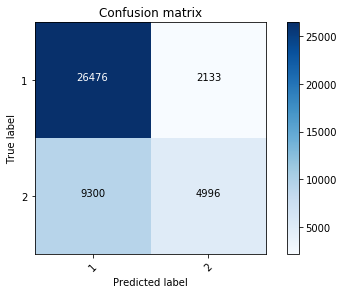

In [124]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_testset, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

### Improving the prediction results: Resampling

The matrix shows while prediction of Severity 1 is good. The accurate prediction is Severity 2 is not. This is a result of the imbalanced data. Another way put, this is a result of Severity 1 being much more representated that Severity 2. This data is not useable because there isn't reliability in having a true Severity 2 being predicted correctly. As it is currently, a true Severity 2 code will only be predicted as a Severity 2 about a third of the time.

We can try resampling to improve our precision, recall, and F1 score.

#### Downsampling the data

One method to balance the Severity output is by down sampling the Severity Code 1 to the number of occurences of Severity Code 2.

In [125]:
from sklearn.utils import resample
dftwo['SEVERITYCODE'].value_counts()

1    95306
2    47708
Name: SEVERITYCODE, dtype: int64

In [126]:
df_majority = dftwo[dftwo.SEVERITYCODE == '1']
df_minority = dftwo[dftwo.SEVERITYCODE == '2']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.SEVERITYCODE.value_counts()

2    47708
1    47708
Name: SEVERITYCODE, dtype: int64

In [127]:
df_downsampled['SEVERITYCODE'] = df_downsampled['SEVERITYCODE'].astype(str)
X = df_downsampled[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'X', 'Y', 'MONTH', 'HOUR', 'WEEKDAY']].values

le_ad = preprocessing.LabelEncoder()
le_ad.fit(['Intersection','Block'])
X[:,0] = le_ad.transform(X[:,0])

le_co = preprocessing.LabelEncoder()
le_co.fit(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'])
X[:,1] = le_co.transform(X[:,1])

le_ju = preprocessing.LabelEncoder()
le_ju.fit(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'At Intersection (but not related to intersection)',
       'Mid-Block (but intersection related)', 'Ramp Junction'])
X[:,6] = le_ju.transform(X[:,6])

le_we = preprocessing.LabelEncoder()
le_we.fit(['Overcast', 'Raining', 'Clear', 'Snowing', 'Other',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
X[:,10] = le_we.transform(X[:,10])

le_ro = preprocessing.LabelEncoder()
le_ro.fit(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'])
X[:,11] = le_ro.transform(X[:,11])

le_li = preprocessing.LabelEncoder()
le_li.fit(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'])
X[:,12] = le_li.transform(X[:,12])

le_pa = preprocessing.LabelEncoder()
le_pa.fit(['N','Y'])
X[:,15] = le_pa.transform(X[:,15])

y = df_downsampled['SEVERITYCODE']


In [128]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
roadTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
roadTree.fit(X_trainset,y_trainset)
predTree = roadTree.predict(X_testset)

In [129]:
print("DecisionTrees's Accuracy:", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy: 0.6934847161572052


              precision    recall  f1-score   support

           1       0.72      0.64      0.68     14328
           2       0.67      0.75      0.71     14297

   micro avg       0.69      0.69      0.69     28625
   macro avg       0.70      0.69      0.69     28625
weighted avg       0.70      0.69      0.69     28625

Confusion matrix, without normalization
[[ 9131  5197]
 [ 3577 10720]]


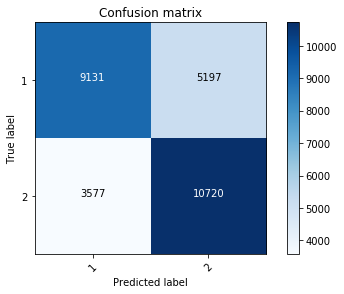

In [130]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_testset, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

#### Upsampling the data

The next method to balance the Severity output is by up sampling the Severity Code 2 to the number of occurences of Severity Code 1.

In [131]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=len(df_majority),     # to match minority class
                                 random_state=123) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.SEVERITYCODE.value_counts()

2    95306
1    95306
Name: SEVERITYCODE, dtype: int64

In [132]:
df_upsampled['SEVERITYCODE'] = df_upsampled['SEVERITYCODE'].astype(str)
X = df_upsampled[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'X', 'Y', 'MONTH', 'HOUR', 'WEEKDAY']].values

le_ad = preprocessing.LabelEncoder()
le_ad.fit(['Intersection','Block'])
X[:,0] = le_ad.transform(X[:,0])

le_co = preprocessing.LabelEncoder()
le_co.fit(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'])
X[:,1] = le_co.transform(X[:,1])

le_ju = preprocessing.LabelEncoder()
le_ju.fit(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'At Intersection (but not related to intersection)',
       'Mid-Block (but intersection related)', 'Ramp Junction'])
X[:,6] = le_ju.transform(X[:,6])

le_we = preprocessing.LabelEncoder()
le_we.fit(['Overcast', 'Raining', 'Clear', 'Snowing', 'Other',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
X[:,10] = le_we.transform(X[:,10])

le_ro = preprocessing.LabelEncoder()
le_ro.fit(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'])
X[:,11] = le_ro.transform(X[:,11])

le_li = preprocessing.LabelEncoder()
le_li.fit(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'])
X[:,12] = le_li.transform(X[:,12])

le_pa = preprocessing.LabelEncoder()
le_pa.fit(['N','Y'])
X[:,15] = le_pa.transform(X[:,15])

y = df_upsampled['SEVERITYCODE']


In [133]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
roadTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
roadTree.fit(X_trainset,y_trainset)
predTree = roadTree.predict(X_testset)

In [134]:
print("DecisionTrees's Accuracy:", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy: 0.6973978735310576


              precision    recall  f1-score   support

           1       0.75      0.60      0.66     28594
           2       0.66      0.80      0.73     28590

   micro avg       0.70      0.70      0.70     57184
   macro avg       0.71      0.70      0.69     57184
weighted avg       0.71      0.70      0.69     57184

Confusion matrix, without normalization
[[17033 11561]
 [ 5743 22847]]


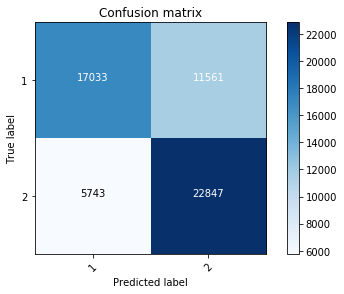

In [135]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y_testset, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

There was a significant improvement in the recall for Severity 2 but at the cost in the recall for Severity 1. While this is not ideal, it does give more reliable predictability in a Severity 2 prediction.

#### Fine Tuning: Inattention and Speeding

The numbers from the previous modelling were satisfactory to call it completed. However, for the sake of thoroughness, it will be tested to see what kind influence keeping the Inattention and Speeding attribute really made. Therefore, the decision tree will be checked without the 'INATTENTIONIND' and 'SPEEDING' data to see if there is any change to the predictions.

In [136]:
X1 = df_upsampled[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
        'ST_COLCODE', 'HITPARKEDCAR', 'X', 'Y', 'MONTH', 'HOUR', 'WEEKDAY']].values

le_ad = preprocessing.LabelEncoder()
le_ad.fit(['Intersection','Block'])
X1[:,0] = le_ad.transform(X1[:,0])

le_co = preprocessing.LabelEncoder()
le_co.fit(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'])
X1[:,1] = le_co.transform(X1[:,1])

le_ju = preprocessing.LabelEncoder()
le_ju.fit(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'At Intersection (but not related to intersection)',
       'Mid-Block (but intersection related)', 'Ramp Junction'])
X1[:,6] = le_ju.transform(X1[:,6])

le_we = preprocessing.LabelEncoder()
le_we.fit(['Overcast', 'Raining', 'Clear', 'Snowing', 'Other',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
X1[:,9] = le_we.transform(X1[:,9])

le_ro = preprocessing.LabelEncoder()
le_ro.fit(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'])
X1[:,10] = le_ro.transform(X1[:,10])

le_li = preprocessing.LabelEncoder()
le_li.fit(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'])
X1[:,11] = le_li.transform(X1[:,11])

le_pa = preprocessing.LabelEncoder()
le_pa.fit(['N','Y'])
X1[:,13] = le_pa.transform(X1[:,13])

y1 = df_upsampled['SEVERITYCODE']

In [137]:
X1_trainset, X1_testset, y1_trainset, y1_testset = train_test_split(X1, y1, test_size=0.3, random_state=3)
roadTree1 = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
roadTree1.fit(X1_trainset,y1_trainset)
predTree1 = roadTree1.predict(X1_testset)
print("DecisionTrees's Accuracy:", metrics.accuracy_score(y1_testset, predTree1))

DecisionTrees's Accuracy: 0.6972055120313374


              precision    recall  f1-score   support

           1       0.74      0.61      0.67     28594
           2       0.67      0.79      0.72     28590

   micro avg       0.70      0.70      0.70     57184
   macro avg       0.70      0.70      0.69     57184
weighted avg       0.70      0.70      0.69     57184

Confusion matrix, without normalization
[[17301 11293]
 [ 6022 22568]]


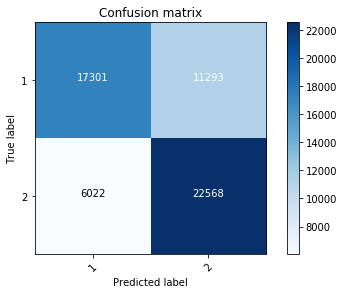

In [138]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y1_testset, predTree1, labels=['1','2'])
np.set_printoptions(precision=2)

print (classification_report(y1_testset, predTree1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

The conclusion: the two attributes did not make any major changes to the outcome. This is likely due to a lot of null values. Therefore, the assumption that was made about Speeding and Inattention was not valid.

### Testing a different model: K Nearest Neighbour Model

The Decision tree model did not give a great improvement from random chance. Another model might give a better predictability.

In [139]:
X2_df = df_upsampled[['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
        'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
        'ST_COLCODE', 'HITPARKEDCAR', 'X', 'Y', 'MONTH', 'HOUR', 'WEEKDAY']]
X2_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,X,Y,MONTH,HOUR,WEEKDAY
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N,-122.347294,47.647172,12,18,2
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N,-122.334540,47.607871,11,10,3
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,23,N,-122.334803,47.604803,3,9,4
5,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Clear,Dry,Daylight,10,N,-122.387598,47.690575,4,17,5
8,1,Block,Parked Car,2,0,0,2,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,32,N,-122.335930,47.611904,6,13,3


In [140]:
X2_df['SEVERITYCODE'] = X2_df['SEVERITYCODE'].astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [141]:
add_le = preprocessing.LabelEncoder()
add_labels = add_le.fit_transform(X2_df['ADDRTYPE'])
X2_df['ADDRTYPE'] = add_labels

coll_le = preprocessing.LabelEncoder()
coll_labels = coll_le.fit_transform(X2_df['COLLISIONTYPE'])
X2_df['COLLISIONTYPE'] = coll_labels

jun_le = preprocessing.LabelEncoder()
jun_labels = jun_le.fit_transform(X2_df['JUNCTIONTYPE'])
X2_df['JUNCTIONTYPE'] = jun_labels

we_le = preprocessing.LabelEncoder()
we_labels = we_le.fit_transform(X2_df['WEATHER'])
X2_df['WEATHER'] = we_labels

ro_le = preprocessing.LabelEncoder()
ro_labels = ro_le.fit_transform(X2_df['ROADCOND'])
X2_df['ROADCOND'] = ro_labels

li_le = preprocessing.LabelEncoder()
li_labels = li_le.fit_transform(X2_df['LIGHTCOND'])
X2_df['LIGHTCOND'] = li_labels

pa_le = preprocessing.LabelEncoder()
pa_labels = pa_le.fit_transform(X2_df['HITPARKEDCAR'])
X2_df['HITPARKEDCAR'] = pa_labels

X2_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,X,Y,MONTH,HOUR,WEEKDAY
1,1,0,9,2,0,0,2,4,16,0,6,7,2,11,0,-122.347294,47.647172,12,18,2
2,1,0,5,4,0,0,3,4,14,0,4,0,5,32,0,-122.334540,47.607871,11,10,3
3,1,0,4,3,0,0,3,4,11,0,1,0,5,23,0,-122.334803,47.604803,3,9,4
5,1,1,0,2,0,0,2,1,11,0,1,0,5,10,0,-122.387598,47.690575,4,17,5
8,1,0,5,2,0,0,2,4,11,0,1,0,5,32,0,-122.335930,47.611904,6,13,3


In [142]:
X2_df.dtypes

SEVERITYCODE       int64
ADDRTYPE           int64
COLLISIONTYPE      int64
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE       int64
SDOT_COLCODE       int64
UNDERINFL          int64
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
ST_COLCODE         int64
HITPARKEDCAR       int64
X                float64
Y                float64
MONTH              int64
HOUR               int64
WEEKDAY            int64
dtype: object

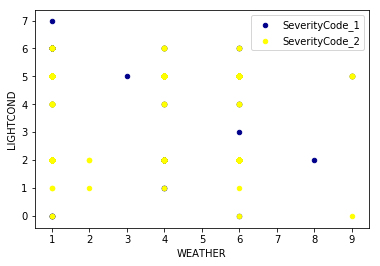

In [143]:
ax = X2_df[X2_df['SEVERITYCODE'] == 1][0:500].plot(kind='scatter', x='WEATHER', y='LIGHTCOND', color='DarkBlue', label='SeverityCode_1');
X2_df[X2_df['SEVERITYCODE'] == 2][0:500].plot(kind='scatter', x='WEATHER', y='LIGHTCOND', color='Yellow', label='SeverityCode_2', ax=ax);
plt.show()

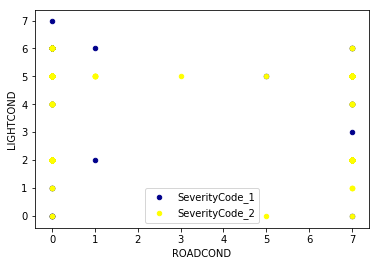

In [144]:
ax = X2_df[X2_df['SEVERITYCODE'] == 1][0:500].plot(kind='scatter', x='ROADCOND', y='LIGHTCOND', color='DarkBlue', label='SeverityCode_1');
X2_df[X2_df['SEVERITYCODE'] == 2][0:500].plot(kind='scatter', x='ROADCOND', y='LIGHTCOND', color='Yellow', label='SeverityCode_2', ax=ax);
plt.show()

In [145]:
feature_df = X2_df[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'ST_COLCODE', 'HITPARKEDCAR', 'X', 'Y', 'MONTH', 'HOUR', 'WEEKDAY']]
X2 = np.asarray(feature_df)
y2 = np.asarray(X2_df['SEVERITYCODE'])

In [146]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=3)

In [147]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [148]:
y2hat = neigh.predict(X2_test)
y2hat[0:5]

array([2, 1, 1, 2, 1])

              precision    recall  f1-score   support

           1       0.76      0.67      0.71     28594
           2       0.71      0.79      0.75     28590

   micro avg       0.73      0.73      0.73     57184
   macro avg       0.73      0.73      0.73     57184
weighted avg       0.73      0.73      0.73     57184

Confusion matrix, without normalization
[[19176  9418]
 [ 6003 22587]]


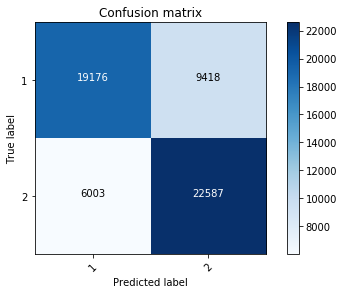

In [149]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2_test, y2hat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y2_test, y2hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

Investigate what would be the most effective k for KNN

In [150]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train)
    y2hat=neigh.predict(X2_test)
    mean_acc[n-1] = f1_score(y2_test, y2hat, average='weighted')

    
    std_acc[n-1]=np.std(y2hat==y2_test)/np.sqrt(y2hat.shape[0])

mean_acc

array([0.81, 0.74, 0.73, 0.71, 0.71, 0.7 , 0.7 , 0.69, 0.7 ])

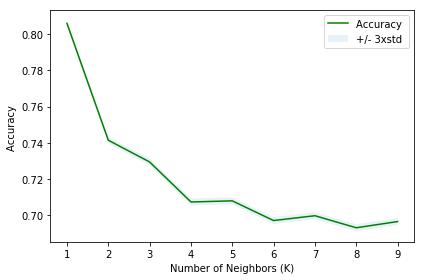

In [151]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Apply the value found exploring different values of k

In [152]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8060150685749294 with k= 1


In [159]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X2_train, y2_train)
y2hat = neigh.predict(X2_test)
y2hat[0:5]

array([1, 1, 1, 2, 1])

              precision    recall  f1-score   support

           1       0.69      0.76      0.72     28594
           2       0.73      0.66      0.69     28590

   micro avg       0.71      0.71      0.71     57184
   macro avg       0.71      0.71      0.71     57184
weighted avg       0.71      0.71      0.71     57184

Confusion matrix, without normalization
[[21725  6869]
 [ 9828 18762]]


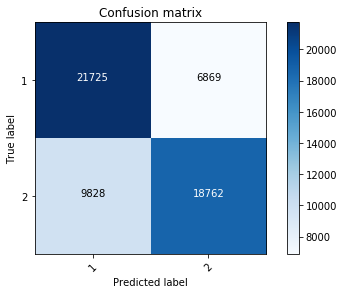

In [160]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2_test, y2hat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y2_test, y2hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

In [155]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X2_train, y2_train)
y2hat = neigh.predict(X2_test)
y2hat[0:5]

array([2, 1, 1, 2, 1])

              precision    recall  f1-score   support

           1       0.71      0.81      0.76     28594
           2       0.78      0.68      0.72     28590

   micro avg       0.74      0.74      0.74     57184
   macro avg       0.75      0.74      0.74     57184
weighted avg       0.75      0.74      0.74     57184

Confusion matrix, without normalization
[[23146  5448]
 [ 9274 19316]]


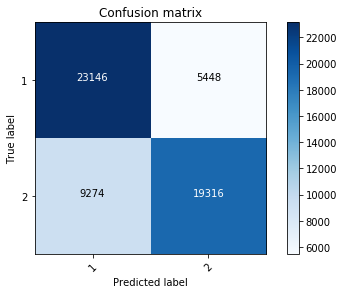

In [156]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2_test, y2hat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y2_test, y2hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

In [157]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X2_train, y2_train)
y2hat = neigh.predict(X2_test)
y2hat[0:5]

array([2, 1, 1, 2, 1])

              precision    recall  f1-score   support

           1       0.86      0.74      0.79     28594
           2       0.77      0.88      0.82     28590

   micro avg       0.81      0.81      0.81     57184
   macro avg       0.81      0.81      0.81     57184
weighted avg       0.81      0.81      0.81     57184

Confusion matrix, without normalization
[[21046  7548]
 [ 3489 25101]]


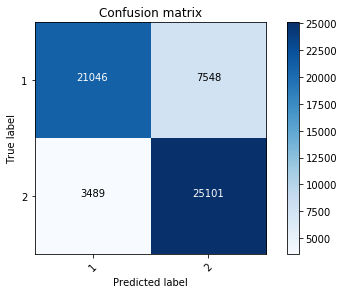

In [158]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2_test, y2hat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y2_test, y2hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')